In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/CT210/DOAN

Mounted at /content/drive/
/content/drive/MyDrive/CT210/DOAN


In [2]:
import numpy as np #tinh toan ma tran
import pandas as pd #tien xu ly du lieu, input output
import matplotlib.pyplot as plt #ve ra bieu do, hinh anh
import os #he dieu hanh, doc file, ghi file, ghi o dia, thu muc
import cv2 #opencv: xu ly thi giac may tinh
from sklearn.model_selection import train_test_split #chia tap train, test
from keras.models import Sequential #khai bao tính tuần tự của mảng
#Activatio: hàm kích hoạt, Flatten: làm phẳng 2d,3d
from keras.layers import Dense, Dropout, Activation, Flatten
#Trích đặc trưng
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras import utils #xử lý thông tin, hồi quy
import tensorflow as tf
from tensorflow import keras

In [3]:
import pickle
# Ham doc anh tu file .data
def load_data():
  file = open('data.data', 'rb')

  # Load thong tin trong file .data
  (pixels, label_ids) = pickle.load(file)

  file.close()

  print(pixels.shape)
  print(label_ids.shape)

  return pixels, label_ids

data, labels = load_data()

# ket qua tra ve:
# (5250, 128, 128, 3)
# (5250, 46)

(5250, 128, 128, 3)
(5250, 46)


In [4]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Shape của tập huấn luyện (x_train, y_train):", x_train.shape, y_train.shape)
print("Shape của tập kiểm tra (x_test, y_test):", x_test.shape, y_test.shape)


Shape của tập huấn luyện (x_train, y_train): (4200, 128, 128, 3) (4200, 46)
Shape của tập kiểm tra (x_test, y_test): (1050, 128, 128, 3) (1050, 46)


In [5]:
class_names = []

# Mở tệp labels.csv và đọc các mô tả lớp
with open('label.csv', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        parts = line.split(';')
        class_name = parts[1].strip()  # Mô tả lớp là phần tử thứ hai sau dấu chấm phẩy
        class_names.append(class_name)

print(class_names)

['Không phải biển báo', 'Cấm đi ngược chiều', 'Cấm ô tô', 'Hạn chế tọng lượng xe', 'Hạn chế trọng lượng trên trục xe', 'Hạn chế chiều cao', 'Dừng lại', 'Cấm rẽ trái', 'Cấm rẽ phải', 'Tốc độ tối đa cho phép', 'Cấm dừng xe và đỗ xe', 'Cấm đỗ xe', 'Chỗ ngoặc nguy hiểm vòng bên trái', 'Chỗ ngoặc nguy hiểm vòng bên phải', 'Nhiều chỗ ngoặc nguy hiểm liên tiếp', 'Nhiều chỗ ngoặc nguy hiểm liên tiếp', 'Đường hẹp về cả hai bên', 'Đường hẹp về phía bên phải', 'Đường giao nhau cùng cấp', 'Đường giao nhau cùng cấp', 'Đường giao nhau cùng cấp', 'Đường giao nhau cùng cấp', 'Giao nhau chạy theo vòng xuyến', 'Giao nhau với đường không ưu tiên', 'Giao nhau với đường không ưu tiên', 'Giao nhau với đường không ưu tiên', 'Giao nhau với đường không ưu tiên', 'Giao nhau với đường không ưu tiên', 'Giao nhau với đường ưu tiên', 'Giao nhau có tín hiệu đèn', 'Cầu hẹp', 'Đường có ổ gà, lồi lõm', 'Đường người đi bộ cắt ngang', 'Trẻ em', 'Công trường', 'Nguy hiểm khác', 'Đi chậm', 'Chú ý xe đỗ', 'Nơi giao nhau chạ

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Sử dụng ResNet50 làm mô hình cơ sở
base_model = ResNet50(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Đóng băng các layers của ResNet50
for layer in base_model.layers:
    layer.trainable = False

# Xây dựng mô hình
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))  # Thêm lớp Dropout để tránh overfitting
model.add(Flatten())
model.add(Dense(len(class_names), activation='softmax'))  # Lớp đầu ra với x units, tương ứng với số lượng lớp

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Hiển thị cấu trúc mô hình
model.summary()


94765736/94765736 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 46)                94254     
                                                                 
Total params: 23681966 (90.34 MB)
Trainable params: 94254

In [7]:
# Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/200
132/132 [==============================] - 21s 95ms/step - loss: 3.9063 - accuracy: 0.0464 - val_loss: 3.7478 - val_accuracy: 0.0543
Epoch 2/200
132/132 [==============================] - 6s 44ms/step - loss: 3.7500 - accuracy: 0.0719 - val_loss: 3.6882 - val_accuracy: 0.0771
Epoch 3/200
132/132 [==============================] - 6s 45ms/step - loss: 3.6608 - accuracy: 0.0921 - val_loss: 3.6282 - val_accuracy: 0.0895
Epoch 4/200
132/132 [==============================] - 6s 46ms/step - loss: 3.6000 - accuracy: 0.1069 - val_loss: 3.5795 - val_accuracy: 0.0990
Epoch 5/200
132/132 [==============================] - 6s 45ms/step - loss: 3.5590 - accuracy: 0.1126 - val_loss: 3.5570 - val_accuracy: 0.1010
Epoch 6/200
132/132 [==============================] - 6s 46ms/step - loss: 3.5183 - accuracy: 0.1238 - val_loss: 3.5004 - val_accuracy: 0.1467
Epoch 7/200
132/132 [==============================] - 6s 46ms/step - loss: 3.4690 - accuracy: 0.1419 - val_loss: 3.4665 - val_accuracy

33/33 [==============================] - 1s 36ms/step
Accuracy: 44.10%


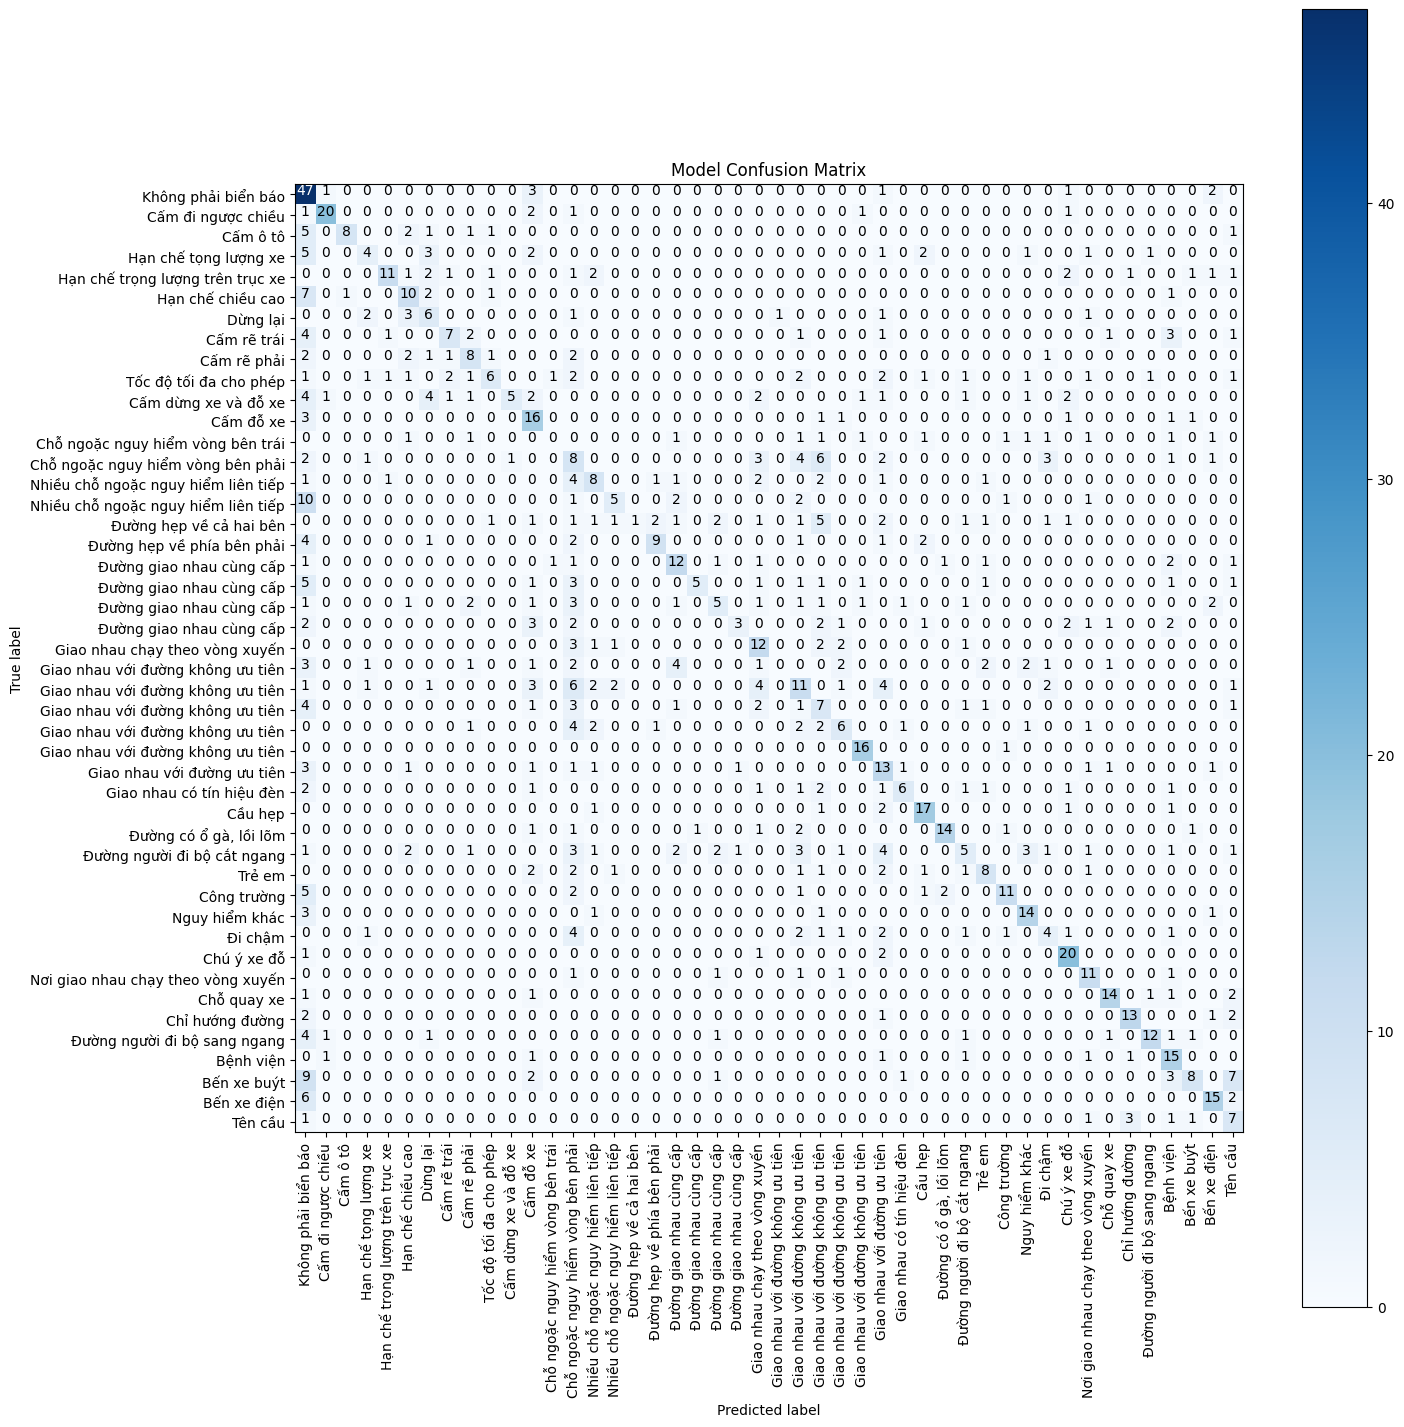

Precision: 50.63%
Recall: 44.10%
F1-score: 42.74%


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Dự đoán trên dữ liệu kiểm tra
pred = model.predict(x_test)
predictions = np.argmax(pred, axis=1)

# Tính ma trận nhầm lẫn
cm = confusion_matrix(np.argmax(y_test, axis=1), predictions)

# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(15, 15))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Model Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

# Hiển thị số liệu trên từng ô của ma trận nhầm lẫn
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Tính độ chính xác
accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
plt.show()

# Tính precision
precision = precision_score(np.argmax(y_test, axis=1), predictions, average='weighted')
print("Precision: %.2f%%" % (precision * 100))

# Tính recall
recall = recall_score(np.argmax(y_test, axis=1), predictions, average='weighted')
print("Recall: %.2f%%" % (recall * 100))

# Tính f1-score
f1 = f1_score(np.argmax(y_test, axis=1), predictions, average='weighted')
print("F1-score: %.2f%%" % (f1 * 100))



In [11]:
# Lưu mô hình
model.save("resnet50.h5")
print("Mô hình đã được lưu thành công.")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Mô hình đã được lưu thành công.


1/1 [==============================] - 1s 853ms/step


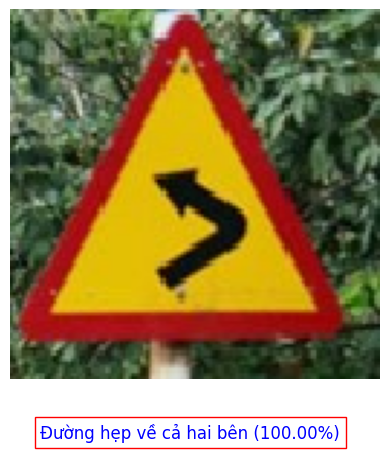

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Đường dẫn của hình ảnh bạn muốn dự đoán
img_path = '/content/drive/MyDrive/CT210/DOAN/a.jpg'

# Load và tiền xử lý hình ảnh
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

# Dự đoán
pred = model.predict(img_preprocessed)
predicted_class_index = np.argmax(pred[0])
predicted_class = class_names[predicted_class_index]
confidence = pred[0][predicted_class_index] * 100

# Hiển thị hình ảnh và kết quả dự đoán
plt.imshow(img)
plt.text(10, img.size[1] + 20, f"{predicted_class} ({confidence:.2f}%)", color="blue", fontsize="large", bbox=dict(fill=False, edgecolor='red', linewidth=1))
plt.axis('off')
plt.show()

